# Recreation of RNaseP time-resolved probing

## Import RNAvigate

In [1]:
import rnavigate as MaP

## Load data

In [2]:
common_data = {"ss":"RC_CRYSTAL_STRUCTURE.xrna",
               "pdb":"3dhsCrystal_PlusLoops.pdb",
               "pdb_kwargs":{"chain":"A"}}
rc0 = MaP.Sample(sample="No Mg++",
                 profile="RC0_rnasep_profile.txt",
                 rings="RC0_rnasep_rings.txt",
                 **common_data)
rc30 = MaP.Sample(sample="30 Seconds",
                  profile="RC30_rnasep_profile.txt",
                  rings="RC30_rnasep_rings.txt",
                  **common_data)
rc1200 = MaP.Sample(sample="Fully folded",
                    profile="RC1200_rnasep_profile.txt",
                    rings="RC1200_rnasep_rings.txt",
                    **common_data)

## Create custom colors and regions

In [3]:
c_list = MaP.get_color_list(length = rc0.data["ss"].length, default = "lightgrey",
            color_regions = {"DarkOrchid":[(236, 240), (181, 188), (45, 47), (49,49), (127,128)],
                             "DodgerBlue":[(189, 195), (15, 21)],
                             "orange":[(58, 62),(101, 105)],
                             "red": [(70, 75), (141, 146)]})

regions = [((225,250), (80,110)), ((225,255), (180,210)), ((135,150), (65,90)),
           ((60,145), (10, 30))]

## Plot time-resolved RINGs

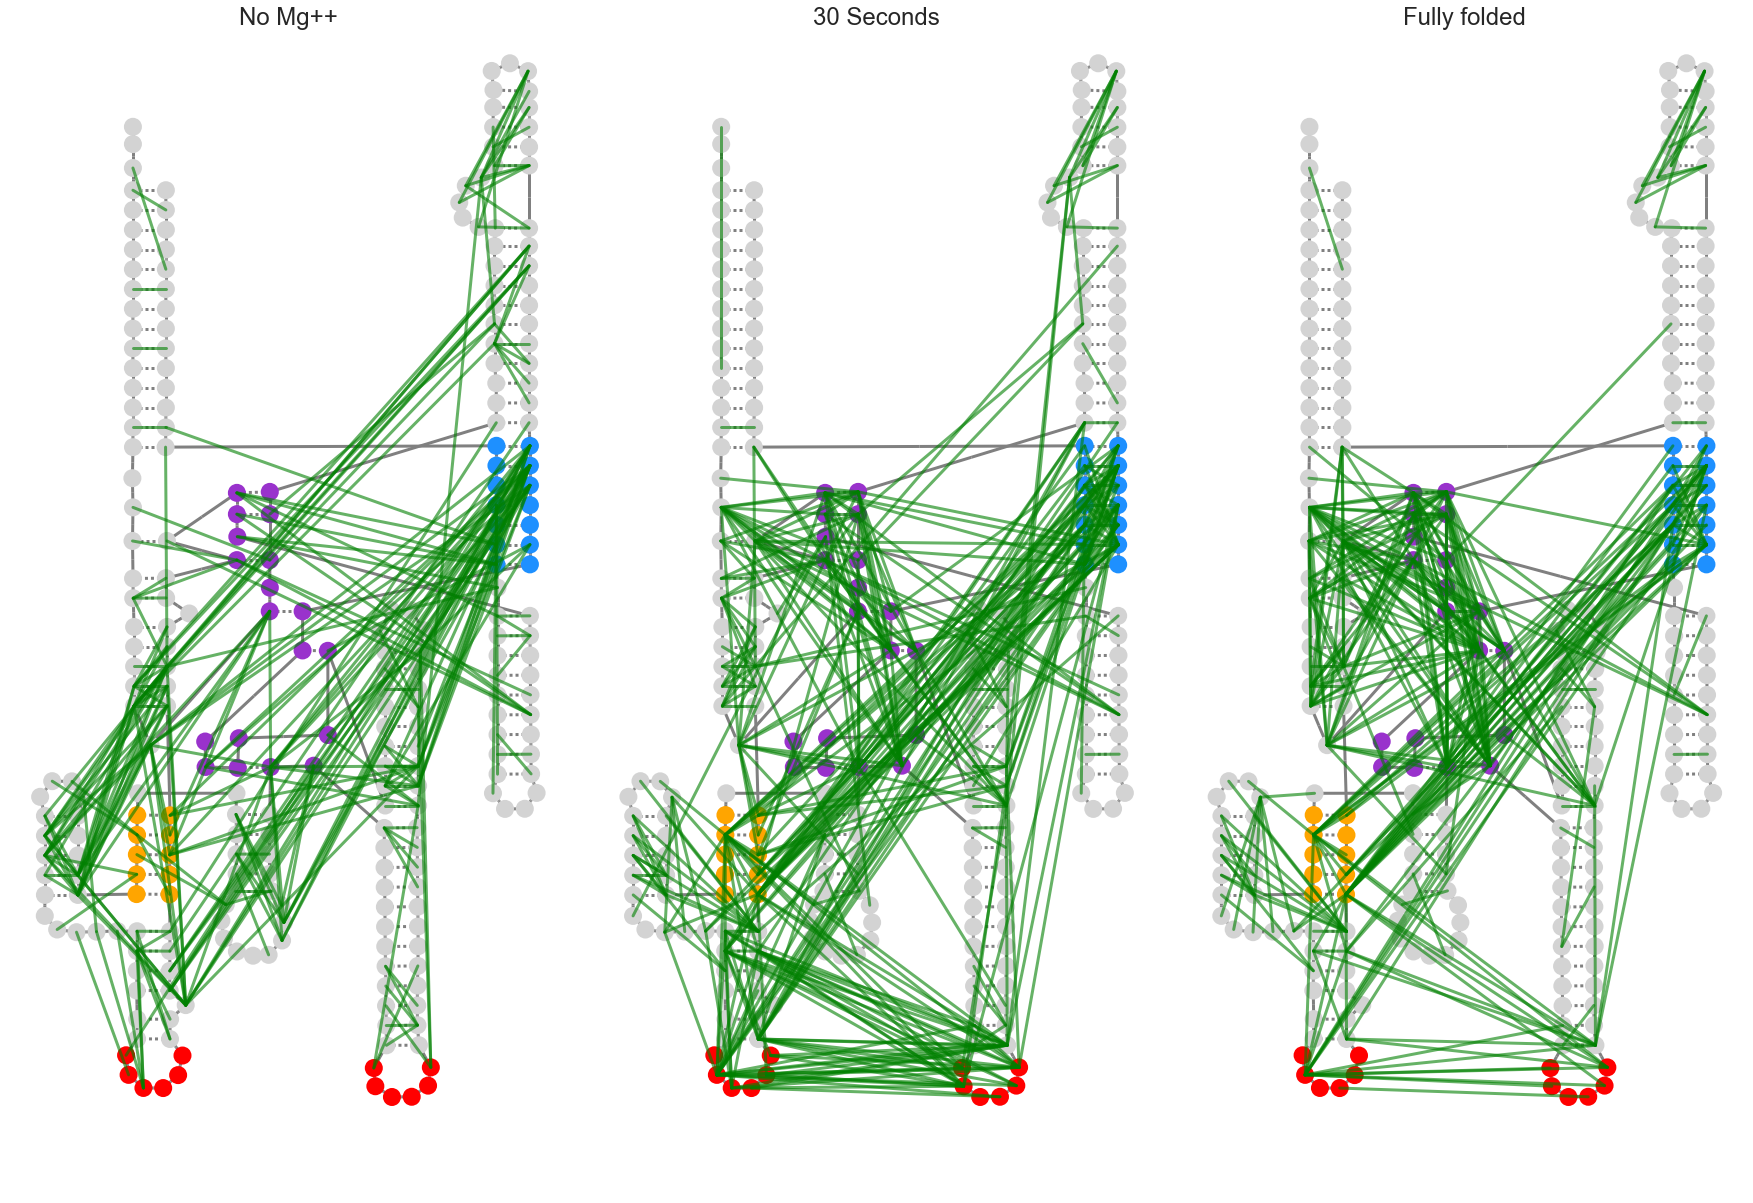

In [4]:
MaP.array_ss([rc0, rc30, rc1200], ij="rings", Statistic_ge=500,
             min_max=[500,550], positive_only=True, cmap="green",
             colors=c_list, apply_color_to="background", colorbar=False)

## Plot detailed structure with sequence.

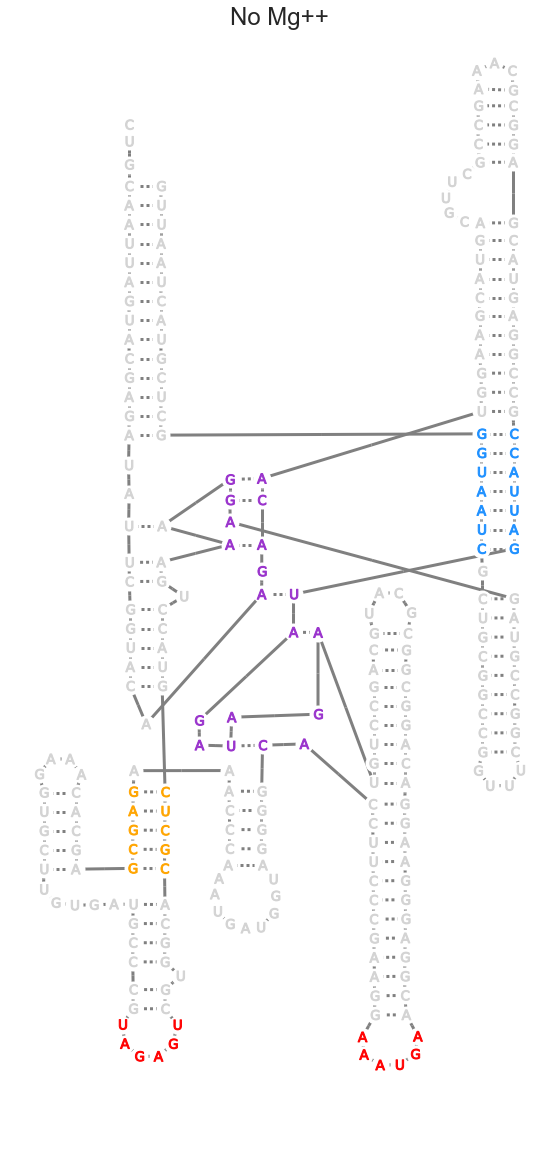

In [5]:
rc0.make_ss(colors=c_list, apply_color_to="sequence")

## Plot time-resolved heatmaps with regions of interest

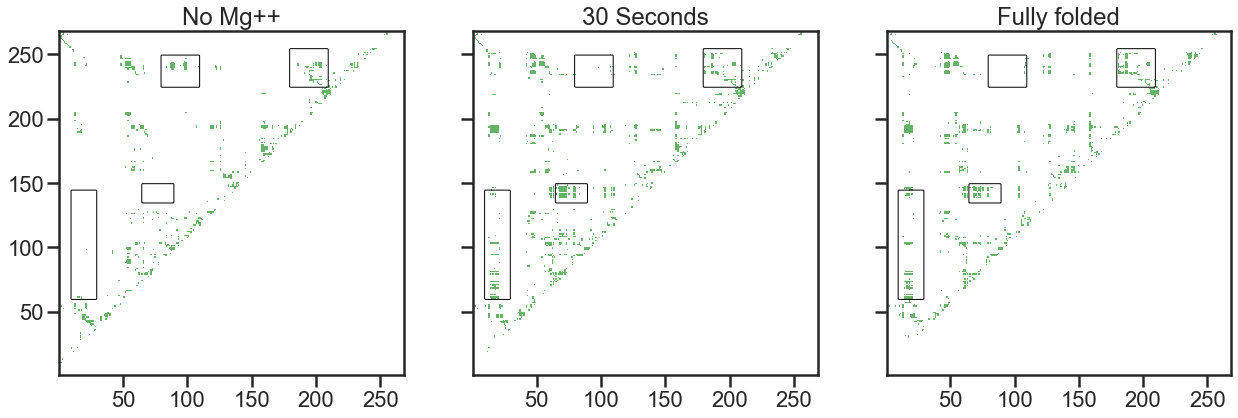

In [6]:
MaP.array_heatmap([rc0, rc30, rc1200], "ss", "rings", regions=regions,
                  cmap=["white", "green"], positive_only=True, min_max=[0,100])

## Plot fully folded RINGs on 3D structure

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

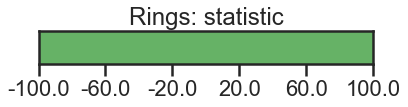

In [7]:
rc1200.make_mol(ij="rings", Statistic=500, positive_only=True, cmap="green",
                nt_color=c_list)